In [27]:
import utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import resnet
import imp

In [13]:
print("Num GPUs Available: ", utils.get_num_gpus())

Num GPUs Available:  1


In [35]:
train_images, test_images, train_labels, test_labels = resnet.load_data()

### Learning rate schedule

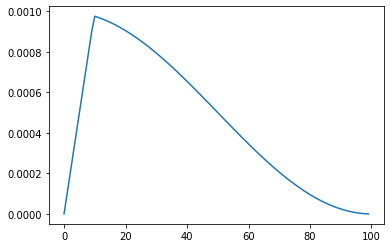

In [18]:
plt.plot([utils.lr_schedule(cur_it=i, max_it=100, max_warm_it=10) for i in range(100)])

In [72]:
all_loss = {}
all_acc_te = {}
all_acc_tr = {}
for res in [True, False]:
    for n in reversed([3, 5, 7, 9]):
        print("╭┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈╮")
        print(f"                         n: {n}, res: {res}")
        if res:
            name = f"res{n}"
        else:
            name = f"plain{n}"
            
        g = tf.Graph()
        with g.as_default():
            nodes = create_graph(name, n=n, residual=res)

        with tf.Session(graph = g) as sess:
            sess.run(tf.global_variables_initializer())
            loss, acc_te, acc_tr = train(sess, nodes, n_epochs=200)
        print("╰┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈╯")

        all_loss[name] = loss
        all_acc_te[name] = acc_te
        all_acc_tr[name] = acc_tr

╭┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈╮
                         n: 9, res: True
size of reduce_mean: (?, 1, 1, 64)
size of squeeze: (?, 64)
training for 78125 iterations
                          epoch 0
iteration 100, loss 2.0810329914093018
iteration 200, loss 1.8318142890930176
iteration 300, loss 1.7563254833221436
TEST accuracy at end of epoch 0: 0.1545
TRAIN accuracy at end of epoch 0: 0.17
                          epoch 1
iteration 400, loss 1.4655488729476929
iteration 500, loss 1.4561790227890015
iteration 600, loss 1.265447974205017
iteration 700, loss 1.2727869749069214
TEST accuracy at end of epoch 1: 0.3281
TRAIN accuracy at end of epoch 1: 0.29
                          epoch 2
iteration 800, loss 1.2178088426589966
iteration 900, loss 1.1996657848358154
iteration 1000, loss 0.9955095648765564
iteration 1100, loss 0.7054802179336548
TEST accuracy at end of epoch 2: 0.5078
TRAIN accuracy at end of epoch 2: 0.47
                          epoch 3
iteration 120

iteration 11700, loss 0.40020331740379333
TEST accuracy at end of epoch 29: 0.8815
TRAIN accuracy at end of epoch 29: 0.99
                          epoch 30
iteration 11800, loss 0.19904224574565887
iteration 11900, loss 0.19754143059253693
iteration 12000, loss 0.2714303731918335
iteration 12100, loss 0.20741890370845795
TEST accuracy at end of epoch 30: 0.8281
TRAIN accuracy at end of epoch 30: 0.87
                          epoch 31
iteration 12200, loss 0.15642255544662476
iteration 12300, loss 0.18948513269424438
iteration 12400, loss 0.2811538577079773
iteration 12500, loss 0.1331200748682022
TEST accuracy at end of epoch 31: 0.873
TRAIN accuracy at end of epoch 31: 0.92
                          epoch 32
iteration 12600, loss 0.09586280584335327
iteration 12700, loss 0.1989830881357193
iteration 12800, loss 0.135698139667511
iteration 12900, loss 0.14601783454418182
TEST accuracy at end of epoch 32: 0.8821
TRAIN accuracy at end of epoch 32: 0.95
                          epoch 

iteration 23100, loss 0.04566128924489021
iteration 23200, loss 0.03779805451631546
iteration 23300, loss 0.04725618660449982
iteration 23400, loss 0.047941479831933975
TEST accuracy at end of epoch 59: 0.8805
TRAIN accuracy at end of epoch 59: 0.95
                          epoch 60
iteration 23500, loss 0.06355144828557968
iteration 23600, loss 0.06422510743141174
iteration 23700, loss 0.08036823570728302
iteration 23800, loss 0.16959065198898315
TEST accuracy at end of epoch 60: 0.8869
TRAIN accuracy at end of epoch 60: 0.99
                          epoch 61
iteration 23900, loss 0.05665426701307297
iteration 24000, loss 0.11550198495388031
iteration 24100, loss 0.05340544879436493
iteration 24200, loss 0.10441017895936966
TEST accuracy at end of epoch 61: 0.8834
TRAIN accuracy at end of epoch 61: 1.0
                          epoch 62
iteration 24300, loss 0.018174290657043457
iteration 24400, loss 0.07088577747344971
iteration 24500, loss 0.09522999823093414
iteration 24600, loss

iteration 34600, loss 0.02449253387749195
iteration 34700, loss 0.015845173969864845
TEST accuracy at end of epoch 88: 0.911
TRAIN accuracy at end of epoch 88: 0.99
                          epoch 89
iteration 34800, loss 0.015317458659410477
iteration 34900, loss 0.04674386605620384
iteration 35000, loss 0.007191450800746679
iteration 35100, loss 0.023226242512464523
TEST accuracy at end of epoch 89: 0.907
TRAIN accuracy at end of epoch 89: 1.0
                          epoch 90
iteration 35200, loss 0.021563153713941574
iteration 35300, loss 0.06272688508033752
iteration 35400, loss 0.018978925421833992
iteration 35500, loss 0.03128046542406082
TEST accuracy at end of epoch 90: 0.9032
TRAIN accuracy at end of epoch 90: 1.0
                          epoch 91
iteration 35600, loss 0.015858188271522522
iteration 35700, loss 0.027510840445756912
iteration 35800, loss 0.0346224308013916
iteration 35900, loss 0.04514409601688385
TEST accuracy at end of epoch 91: 0.9012
TRAIN accuracy at en

iteration 45900, loss 0.004887280520051718
iteration 46000, loss 0.005627105478197336
iteration 46100, loss 0.005659440066665411
TEST accuracy at end of epoch 117: 0.9145
TRAIN accuracy at end of epoch 117: 1.0
                          epoch 118
iteration 46200, loss 0.017004244029521942
iteration 46300, loss 0.0016049923142418265
iteration 46400, loss 0.0024864310398697853
iteration 46500, loss 0.0031801508739590645
TEST accuracy at end of epoch 118: 0.9166
TRAIN accuracy at end of epoch 118: 1.0
                          epoch 119
iteration 46600, loss 0.013325942680239677
iteration 46700, loss 0.002922707935795188
iteration 46800, loss 0.0060675134882330894
iteration 46900, loss 0.007114719599485397
TEST accuracy at end of epoch 119: 0.9165
TRAIN accuracy at end of epoch 119: 1.0
                          epoch 120
iteration 47000, loss 0.014645966701209545
iteration 47100, loss 0.0010532957967370749
iteration 47200, loss 0.002428731881082058
iteration 47300, loss 0.019232178106904

iteration 57100, loss 0.0028688597958534956
iteration 57200, loss 0.0012527363141998649
iteration 57300, loss 0.008478914387524128
iteration 57400, loss 0.0018420503474771976
TEST accuracy at end of epoch 146: 0.9216
TRAIN accuracy at end of epoch 146: 1.0
                          epoch 147
iteration 57500, loss 0.00020223704632371664
iteration 57600, loss 0.0007304173777811229
iteration 57700, loss 0.00406532222405076
iteration 57800, loss 0.0001262716978089884
TEST accuracy at end of epoch 147: 0.9212
TRAIN accuracy at end of epoch 147: 1.0
                          epoch 148
iteration 57900, loss 0.0003851859364658594
iteration 58000, loss 0.000279370229691267
iteration 58100, loss 0.006829455494880676
iteration 58200, loss 0.002035475103184581
TEST accuracy at end of epoch 148: 0.9199
TRAIN accuracy at end of epoch 148: 1.0
                          epoch 149
iteration 58300, loss 0.004781784489750862
iteration 58400, loss 0.0017929907189682126
iteration 58500, loss 0.006187432911

iteration 68300, loss 8.025336137507111e-05
iteration 68400, loss 0.0003046756028197706
TEST accuracy at end of epoch 174: 0.9222
TRAIN accuracy at end of epoch 174: 1.0
                          epoch 175
iteration 68500, loss 0.0002871924079954624
iteration 68600, loss 0.003817026736214757
iteration 68700, loss 0.0031345540191978216
iteration 68800, loss 0.0001822484628064558
TEST accuracy at end of epoch 175: 0.9224
TRAIN accuracy at end of epoch 175: 1.0
                          epoch 176
iteration 68900, loss 5.528495239559561e-05
iteration 69000, loss 0.00021889641357120126
iteration 69100, loss 0.00021572349942289293
iteration 69200, loss 0.009245411492884159
TEST accuracy at end of epoch 176: 0.9222
TRAIN accuracy at end of epoch 176: 1.0
                          epoch 177
iteration 69300, loss 0.00037943749339319766
iteration 69400, loss 0.0009598530596122146
iteration 69500, loss 0.001479900791309774
TEST accuracy at end of epoch 177: 0.9224
TRAIN accuracy at end of epoch 1

iteration 800, loss 1.1254215240478516
iteration 900, loss 1.0164515972137451
iteration 1000, loss 0.8273277878761292
iteration 1100, loss 0.8553223609924316
TEST accuracy at end of epoch 2: 0.4012
TRAIN accuracy at end of epoch 2: 0.42
                          epoch 3
iteration 1200, loss 0.7407993674278259
iteration 1300, loss 0.7619147300720215
iteration 1400, loss 0.7569274306297302
iteration 1500, loss 0.7028195858001709
TEST accuracy at end of epoch 3: 0.4678
TRAIN accuracy at end of epoch 3: 0.46
                          epoch 4
iteration 1600, loss 0.5860752463340759
iteration 1700, loss 0.7102830410003662
iteration 1800, loss 0.5658128261566162
iteration 1900, loss 0.5838279724121094
TEST accuracy at end of epoch 4: 0.5446
TRAIN accuracy at end of epoch 4: 0.47
                          epoch 5
iteration 2000, loss 0.5327438116073608
iteration 2100, loss 0.7145617604255676
iteration 2200, loss 0.535852313041687
iteration 2300, loss 0.5228555798530579
TEST accuracy at end of 

iteration 12600, loss 0.10322687774896622
iteration 12700, loss 0.18066081404685974
iteration 12800, loss 0.22291377186775208
iteration 12900, loss 0.19179604947566986
TEST accuracy at end of epoch 32: 0.863
TRAIN accuracy at end of epoch 32: 0.93
                          epoch 33
iteration 13000, loss 0.19555775821208954
iteration 13100, loss 0.252197802066803
iteration 13200, loss 0.16165035963058472
TEST accuracy at end of epoch 33: 0.8653
TRAIN accuracy at end of epoch 33: 0.9
                          epoch 34
iteration 13300, loss 0.1990007609128952
iteration 13400, loss 0.236985981464386
iteration 13500, loss 0.11761771887540817
iteration 13600, loss 0.24739831686019897
TEST accuracy at end of epoch 34: 0.8715
TRAIN accuracy at end of epoch 34: 0.88
                          epoch 35
iteration 13700, loss 0.08946104347705841
iteration 13800, loss 0.176212877035141
iteration 13900, loss 0.15676680207252502
iteration 14000, loss 0.1347455233335495
TEST accuracy at end of epoch 35

iteration 24200, loss 0.11732751131057739
TEST accuracy at end of epoch 61: 0.8939
TRAIN accuracy at end of epoch 61: 0.94
                          epoch 62
iteration 24300, loss 0.14372923970222473
iteration 24400, loss 0.02706982009112835
iteration 24500, loss 0.08093586564064026
iteration 24600, loss 0.09725435823202133
TEST accuracy at end of epoch 62: 0.8787
TRAIN accuracy at end of epoch 62: 0.96
                          epoch 63
iteration 24700, loss 0.11552482098340988
iteration 24800, loss 0.05924686789512634
iteration 24900, loss 0.10762086510658264
iteration 25000, loss 0.08212699741125107
TEST accuracy at end of epoch 63: 0.8826
TRAIN accuracy at end of epoch 63: 0.98
                          epoch 64
iteration 25100, loss 0.06519590318202972
iteration 25200, loss 0.0585344061255455
iteration 25300, loss 0.09637526422739029
iteration 25400, loss 0.10670156031847
TEST accuracy at end of epoch 64: 0.8874
TRAIN accuracy at end of epoch 64: 0.97
                          epo

iteration 35600, loss 0.04274766892194748
iteration 35700, loss 0.0039933775551617146
iteration 35800, loss 0.019551873207092285
iteration 35900, loss 0.058329109102487564
TEST accuracy at end of epoch 91: 0.9024
TRAIN accuracy at end of epoch 91: 1.0
                          epoch 92
iteration 36000, loss 0.0025123595260083675
iteration 36100, loss 0.009392226114869118
iteration 36200, loss 0.10311968624591827
iteration 36300, loss 0.03397025540471077
TEST accuracy at end of epoch 92: 0.9082
TRAIN accuracy at end of epoch 92: 0.99
                          epoch 93
iteration 36400, loss 0.004442608915269375
iteration 36500, loss 0.02798750437796116
iteration 36600, loss 0.011620501056313515
iteration 36700, loss 0.02060341089963913
TEST accuracy at end of epoch 93: 0.9069
TRAIN accuracy at end of epoch 93: 0.98
                          epoch 94
iteration 36800, loss 0.005724034737795591
iteration 36900, loss 0.017366211861371994
iteration 37000, loss 0.06270013749599457
iteration 37

iteration 47000, loss 0.007979114539921284
iteration 47100, loss 0.003855672664940357
iteration 47200, loss 0.042015496641397476
iteration 47300, loss 0.025184571743011475
TEST accuracy at end of epoch 120: 0.9146
TRAIN accuracy at end of epoch 120: 1.0
                          epoch 121
iteration 47400, loss 0.002494396176189184
iteration 47500, loss 0.0009203733643516898
iteration 47600, loss 0.003539903089404106
iteration 47700, loss 0.010255426168441772
TEST accuracy at end of epoch 121: 0.9117
TRAIN accuracy at end of epoch 121: 1.0
                          epoch 122
iteration 47800, loss 0.01618807762861252
iteration 47900, loss 0.026001499965786934
iteration 48000, loss 0.06796173751354218
TEST accuracy at end of epoch 122: 0.9126
TRAIN accuracy at end of epoch 122: 1.0
                          epoch 123
iteration 48100, loss 0.026954444125294685
iteration 48200, loss 0.004287140443921089
iteration 48300, loss 0.014398063533008099
iteration 48400, loss 0.002771844854578376
TE

iteration 58300, loss 0.0017886837013065815
iteration 58400, loss 0.0020964983850717545
iteration 58500, loss 0.0019907504320144653
iteration 58600, loss 0.0017627859488129616
TEST accuracy at end of epoch 149: 0.9179
TRAIN accuracy at end of epoch 149: 1.0
                          epoch 150
iteration 58700, loss 0.0007792949327267706
iteration 58800, loss 0.00029466566047631204
iteration 58900, loss 0.0019830188248306513
iteration 59000, loss 0.0019575415644794703
TEST accuracy at end of epoch 150: 0.9186
TRAIN accuracy at end of epoch 150: 1.0
                          epoch 151
iteration 59100, loss 0.00018828392785508186
iteration 59200, loss 0.0028390439692884684
iteration 59300, loss 0.016981732100248337
iteration 59400, loss 0.008599518798291683
TEST accuracy at end of epoch 151: 0.9187
TRAIN accuracy at end of epoch 151: 1.0
                          epoch 152
iteration 59500, loss 0.02579294517636299
iteration 59600, loss 0.0014328241813927889
iteration 59700, loss 0.04842266

iteration 69500, loss 0.0011019790545105934
TEST accuracy at end of epoch 177: 0.9195
TRAIN accuracy at end of epoch 177: 1.0
                          epoch 178
iteration 69600, loss 0.0006427316111512482
iteration 69700, loss 8.350241114385426e-05
iteration 69800, loss 0.0038167955353856087
iteration 69900, loss 0.0006352027412503958
TEST accuracy at end of epoch 178: 0.9195
TRAIN accuracy at end of epoch 178: 1.0
                          epoch 179
iteration 70000, loss 0.008890892378985882
iteration 70100, loss 0.0031575036700814962
iteration 70200, loss 0.0003927784273400903
iteration 70300, loss 0.000801917165517807
TEST accuracy at end of epoch 179: 0.9196
TRAIN accuracy at end of epoch 179: 1.0
                          epoch 180
iteration 70400, loss 9.888417844194919e-05
iteration 70500, loss 0.0014553614892065525
iteration 70600, loss 0.00017519999528303742
iteration 70700, loss 0.000286987517029047
TEST accuracy at end of epoch 180: 0.9194
TRAIN accuracy at end of epoch 180

iteration 2300, loss 0.5032786726951599
TEST accuracy at end of epoch 5: 0.7753
TRAIN accuracy at end of epoch 5: 0.81
                          epoch 6
iteration 2400, loss 0.4937388300895691
iteration 2500, loss 0.5523918867111206
iteration 2600, loss 0.6593533754348755
iteration 2700, loss 0.435311496257782
TEST accuracy at end of epoch 6: 0.7621
TRAIN accuracy at end of epoch 6: 0.76
                          epoch 7
iteration 2800, loss 0.46962612867355347
iteration 2900, loss 0.4659841060638428
iteration 3000, loss 0.3801578879356384
iteration 3100, loss 0.61115962266922
TEST accuracy at end of epoch 7: 0.7488
TRAIN accuracy at end of epoch 7: 0.74
                          epoch 8
iteration 3200, loss 0.524552583694458
iteration 3300, loss 0.689268171787262
iteration 3400, loss 0.39646756649017334
iteration 3500, loss 0.4589395523071289
TEST accuracy at end of epoch 8: 0.7535
TRAIN accuracy at end of epoch 8: 0.82
                          epoch 9
iteration 3600, loss 0.37531334

iteration 14000, loss 0.12923961877822876
TEST accuracy at end of epoch 35: 0.858
TRAIN accuracy at end of epoch 35: 0.93
                          epoch 36
iteration 14100, loss 0.2044396996498108
iteration 14200, loss 0.06780799478292465
iteration 14300, loss 0.22302551567554474
iteration 14400, loss 0.1693088710308075
TEST accuracy at end of epoch 36: 0.8602
TRAIN accuracy at end of epoch 36: 0.91
                          epoch 37
iteration 14500, loss 0.1254201978445053
iteration 14600, loss 0.14002138376235962
iteration 14700, loss 0.19026872515678406
iteration 14800, loss 0.2926125228404999
TEST accuracy at end of epoch 37: 0.8747
TRAIN accuracy at end of epoch 37: 0.91
                          epoch 38
iteration 14900, loss 0.17730233073234558
iteration 15000, loss 0.13309362530708313
iteration 15100, loss 0.24002638459205627
iteration 15200, loss 0.10226090252399445
TEST accuracy at end of epoch 38: 0.8654
TRAIN accuracy at end of epoch 38: 0.92
                          epoc

iteration 25500, loss 0.1660030037164688
iteration 25600, loss 0.08452585339546204
iteration 25700, loss 0.09394781291484833
iteration 25800, loss 0.050407588481903076
TEST accuracy at end of epoch 65: 0.8857
TRAIN accuracy at end of epoch 65: 0.95
                          epoch 66
iteration 25900, loss 0.026325538754463196
iteration 26000, loss 0.053486451506614685
iteration 26100, loss 0.028118927031755447
TEST accuracy at end of epoch 66: 0.8845
TRAIN accuracy at end of epoch 66: 0.98
                          epoch 67
iteration 26200, loss 0.04364520311355591
iteration 26300, loss 0.050713006407022476
iteration 26400, loss 0.11843496561050415
iteration 26500, loss 0.059024229645729065
TEST accuracy at end of epoch 67: 0.8859
TRAIN accuracy at end of epoch 67: 0.96
                          epoch 68
iteration 26600, loss 0.042461879551410675
iteration 26700, loss 0.11011330783367157
iteration 26800, loss 0.05025043338537216
iteration 26900, loss 0.10730700939893723
TEST accuracy at

iteration 37000, loss 0.006335936952382326
iteration 37100, loss 0.020954739302396774
TEST accuracy at end of epoch 94: 0.8951
TRAIN accuracy at end of epoch 94: 0.98
                          epoch 95
iteration 37200, loss 0.011652352288365364
iteration 37300, loss 0.08159583806991577
iteration 37400, loss 0.04627733305096626
iteration 37500, loss 0.08277072012424469
TEST accuracy at end of epoch 95: 0.8971
TRAIN accuracy at end of epoch 95: 1.0
                          epoch 96
iteration 37600, loss 0.09366637468338013
iteration 37700, loss 0.03246065229177475
iteration 37800, loss 0.03910012170672417
iteration 37900, loss 0.056603334844112396
TEST accuracy at end of epoch 96: 0.8888
TRAIN accuracy at end of epoch 96: 0.98
                          epoch 97
iteration 38000, loss 0.036202289164066315
iteration 38100, loss 0.009359408169984818
iteration 38200, loss 0.12441647797822952
iteration 38300, loss 0.033383291214704514
TEST accuracy at end of epoch 97: 0.9026
TRAIN accuracy at

iteration 48200, loss 0.022136123850941658
iteration 48300, loss 0.003599633928388357
iteration 48400, loss 0.02737482450902462
TEST accuracy at end of epoch 123: 0.909
TRAIN accuracy at end of epoch 123: 1.0
                          epoch 124
iteration 48500, loss 0.002722404431551695
iteration 48600, loss 0.00337978289462626
iteration 48700, loss 0.012104157358407974
iteration 48800, loss 0.01447199285030365
TEST accuracy at end of epoch 124: 0.9106
TRAIN accuracy at end of epoch 124: 1.0
                          epoch 125
iteration 48900, loss 0.01278725080192089
iteration 49000, loss 0.00922355242073536
iteration 49100, loss 0.008554551750421524
iteration 49200, loss 0.0375342033803463
TEST accuracy at end of epoch 125: 0.9091
TRAIN accuracy at end of epoch 125: 1.0
                          epoch 126
iteration 49300, loss 0.017033923417329788
iteration 49400, loss 0.00900314375758171
iteration 49500, loss 0.03546582907438278
iteration 49600, loss 0.008299638517200947
TEST accura

iteration 59500, loss 0.002664881758391857
iteration 59600, loss 0.009907970204949379
iteration 59700, loss 0.002156447619199753
iteration 59800, loss 0.003460875479504466
TEST accuracy at end of epoch 152: 0.9113
TRAIN accuracy at end of epoch 152: 1.0
                          epoch 153
iteration 59900, loss 0.000982505502179265
iteration 60000, loss 0.0014087226008996367
iteration 60100, loss 0.002863312605768442
iteration 60200, loss 0.0012375152437016368
TEST accuracy at end of epoch 153: 0.9123
TRAIN accuracy at end of epoch 153: 1.0
                          epoch 154
iteration 60300, loss 0.03135671839118004
iteration 60400, loss 0.0021706041879951954
iteration 60500, loss 0.012142681516706944
iteration 60600, loss 0.005360931623727083
TEST accuracy at end of epoch 154: 0.9125
TRAIN accuracy at end of epoch 154: 1.0
                          epoch 155
iteration 60700, loss 0.003315098350867629
iteration 60800, loss 0.014830770902335644
iteration 60900, loss 0.009417609311640263

TEST accuracy at end of epoch 180: 0.9146
TRAIN accuracy at end of epoch 180: 1.0
                          epoch 181
iteration 70800, loss 5.522068386198953e-05
iteration 70900, loss 0.0020152481738477945
iteration 71000, loss 0.0007990323356352746
iteration 71100, loss 0.0009881085716187954
TEST accuracy at end of epoch 181: 0.9147
TRAIN accuracy at end of epoch 181: 1.0
                          epoch 182
iteration 71200, loss 0.005280962213873863
iteration 71300, loss 0.0034308813046664
iteration 71400, loss 0.00294517888687551
iteration 71500, loss 0.004368482157588005
TEST accuracy at end of epoch 182: 0.914
TRAIN accuracy at end of epoch 182: 1.0
                          epoch 183
iteration 71600, loss 0.002664112253114581
iteration 71700, loss 0.000589313916862011
iteration 71800, loss 0.0066322931088507175
iteration 71900, loss 0.0011153463274240494
TEST accuracy at end of epoch 183: 0.9137
TRAIN accuracy at end of epoch 183: 0.99
                          epoch 184
iteration

iteration 3600, loss 0.5321890115737915
iteration 3700, loss 0.4098251163959503
iteration 3800, loss 0.4434494376182556
iteration 3900, loss 0.47997477650642395
TEST accuracy at end of epoch 9: 0.8049
TRAIN accuracy at end of epoch 9: 0.83
                          epoch 10
iteration 4000, loss 0.3418161869049072
iteration 4100, loss 0.533062219619751
iteration 4200, loss 0.2880774140357971
iteration 4300, loss 0.3633609712123871
TEST accuracy at end of epoch 10: 0.7992
TRAIN accuracy at end of epoch 10: 0.84
                          epoch 11
iteration 4400, loss 0.3405272364616394
iteration 4500, loss 0.33085203170776367
iteration 4600, loss 0.49026837944984436
TEST accuracy at end of epoch 11: 0.7545
TRAIN accuracy at end of epoch 11: 0.73
                          epoch 12
iteration 4700, loss 0.4627982974052429
iteration 4800, loss 0.3545210361480713
iteration 4900, loss 0.31835609674453735
iteration 5000, loss 0.27946364879608154
TEST accuracy at end of epoch 12: 0.8077
TRAIN acc

iteration 15300, loss 0.09756594896316528
iteration 15400, loss 0.19141383469104767
iteration 15500, loss 0.1432596743106842
iteration 15600, loss 0.17190726101398468
TEST accuracy at end of epoch 39: 0.8579
TRAIN accuracy at end of epoch 39: 0.9
                          epoch 40
iteration 15700, loss 0.16310539841651917
iteration 15800, loss 0.1281227171421051
iteration 15900, loss 0.0952834039926529
iteration 16000, loss 0.1333457976579666
TEST accuracy at end of epoch 40: 0.8711
TRAIN accuracy at end of epoch 40: 0.88
                          epoch 41
iteration 16100, loss 0.18387673795223236
iteration 16200, loss 0.20104649662971497
iteration 16300, loss 0.10564428567886353
iteration 16400, loss 0.18207646906375885
TEST accuracy at end of epoch 41: 0.861
TRAIN accuracy at end of epoch 41: 0.87
                          epoch 42
iteration 16500, loss 0.13981974124908447
iteration 16600, loss 0.17595341801643372
iteration 16700, loss 0.19514644145965576
iteration 16800, loss 0.1595

iteration 26900, loss 0.129150390625
TEST accuracy at end of epoch 68: 0.8729
TRAIN accuracy at end of epoch 68: 0.96
                          epoch 69
iteration 27000, loss 0.0899999737739563
iteration 27100, loss 0.09967383742332458
iteration 27200, loss 0.07677562534809113
iteration 27300, loss 0.21000753343105316
TEST accuracy at end of epoch 69: 0.8825
TRAIN accuracy at end of epoch 69: 0.96
                          epoch 70
iteration 27400, loss 0.09802600741386414
iteration 27500, loss 0.03903006762266159
iteration 27600, loss 0.09504292160272598
iteration 27700, loss 0.13760395348072052
TEST accuracy at end of epoch 70: 0.8901
TRAIN accuracy at end of epoch 70: 0.97
                          epoch 71
iteration 27800, loss 0.08330608904361725
iteration 27900, loss 0.08542651683092117
iteration 28000, loss 0.0795864686369896
iteration 28100, loss 0.09746496379375458
TEST accuracy at end of epoch 71: 0.8812
TRAIN accuracy at end of epoch 71: 0.97
                          epoch 

iteration 38400, loss 0.034003183245658875
iteration 38500, loss 0.03904782980680466
iteration 38600, loss 0.033158764243125916
iteration 38700, loss 0.08717436343431473
TEST accuracy at end of epoch 98: 0.8906
TRAIN accuracy at end of epoch 98: 0.98
                          epoch 99
iteration 38800, loss 0.043639328330755234
iteration 38900, loss 0.035061873495578766
iteration 39000, loss 0.020043347030878067
iteration 39100, loss 0.05096746236085892
TEST accuracy at end of epoch 99: 0.8989
TRAIN accuracy at end of epoch 99: 1.0
                          epoch 100
iteration 39200, loss 0.046513982117176056
iteration 39300, loss 0.08206456899642944
iteration 39400, loss 0.07091452926397324
TEST accuracy at end of epoch 100: 0.8948
TRAIN accuracy at end of epoch 100: 1.0
                          epoch 101
iteration 39500, loss 0.022845424711704254
iteration 39600, loss 0.07861514389514923
iteration 39700, loss 0.04326840117573738
iteration 39800, loss 0.046732425689697266
TEST accurac

iteration 49700, loss 0.0344739593565464
iteration 49800, loss 0.033719439059495926
iteration 49900, loss 0.011914231814444065
iteration 50000, loss 0.015459311194717884
TEST accuracy at end of epoch 127: 0.9036
TRAIN accuracy at end of epoch 127: 1.0
                          epoch 128
iteration 50100, loss 0.020348861813545227
iteration 50200, loss 0.02052624523639679
iteration 50300, loss 0.03298553079366684
iteration 50400, loss 0.013276014477014542
TEST accuracy at end of epoch 128: 0.9022
TRAIN accuracy at end of epoch 128: 0.99
                          epoch 129
iteration 50500, loss 0.08444961160421371
iteration 50600, loss 0.00454888679087162
iteration 50700, loss 0.008344855159521103
iteration 50800, loss 0.014368366450071335
TEST accuracy at end of epoch 129: 0.9031
TRAIN accuracy at end of epoch 129: 1.0
                          epoch 130
iteration 50900, loss 0.02567857876420021
iteration 51000, loss 0.045232877135276794
iteration 51100, loss 0.05290087312459946
iteratio

iteration 61000, loss 0.014555595815181732
iteration 61100, loss 0.026045382022857666
iteration 61200, loss 0.0048396289348602295
iteration 61300, loss 0.006013980135321617
TEST accuracy at end of epoch 156: 0.9061
TRAIN accuracy at end of epoch 156: 1.0
                          epoch 157
iteration 61400, loss 0.006944745313376188
iteration 61500, loss 0.0026539089158177376
iteration 61600, loss 0.025546330958604813
iteration 61700, loss 0.00310659222304821
TEST accuracy at end of epoch 157: 0.9085
TRAIN accuracy at end of epoch 157: 1.0
                          epoch 158
iteration 61800, loss 0.005536391865462065
iteration 61900, loss 0.003282152581959963
iteration 62000, loss 0.010669190436601639
iteration 62100, loss 0.02283639647066593
TEST accuracy at end of epoch 158: 0.9065
TRAIN accuracy at end of epoch 158: 1.0
                          epoch 159
iteration 62200, loss 0.0021528524812310934
iteration 62300, loss 0.016457606106996536
iteration 62400, loss 0.012210560962557793


TEST accuracy at end of epoch 184: 0.9108
TRAIN accuracy at end of epoch 184: 1.0
                          epoch 185
iteration 72400, loss 0.0041822162456810474
iteration 72500, loss 0.005800226703286171
iteration 72600, loss 0.00826636515557766
iteration 72700, loss 0.007197065744549036
TEST accuracy at end of epoch 185: 0.9112
TRAIN accuracy at end of epoch 185: 1.0
                          epoch 186
iteration 72800, loss 0.015705013647675514
iteration 72900, loss 0.006591221317648888
iteration 73000, loss 0.002521544462069869
iteration 73100, loss 0.016002926975488663
TEST accuracy at end of epoch 186: 0.9104
TRAIN accuracy at end of epoch 186: 1.0
                          epoch 187
iteration 73200, loss 0.002434020396322012
iteration 73300, loss 0.007564620580524206
iteration 73400, loss 0.02593880519270897
iteration 73500, loss 0.005636009853333235
TEST accuracy at end of epoch 187: 0.9106
TRAIN accuracy at end of epoch 187: 0.99
                          epoch 188
iteration 73

iteration 5300, loss 1.3193168640136719
iteration 5400, loss 1.3094630241394043
TEST accuracy at end of epoch 13: 0.4684
TRAIN accuracy at end of epoch 13: 0.42
                          epoch 14
iteration 5500, loss 1.1758414506912231
iteration 5600, loss 1.0748934745788574
iteration 5700, loss 1.1601712703704834
iteration 5800, loss 1.3553951978683472
TEST accuracy at end of epoch 14: 0.5575
TRAIN accuracy at end of epoch 14: 0.59
                          epoch 15
iteration 5900, loss 1.024653673171997
iteration 6000, loss 1.348629355430603
iteration 6100, loss 1.2172579765319824
iteration 6200, loss 1.1507117748260498
TEST accuracy at end of epoch 15: 0.5255
TRAIN accuracy at end of epoch 15: 0.55
                          epoch 16
iteration 6300, loss 0.9611028432846069
iteration 6400, loss 1.1762807369232178
iteration 6500, loss 1.2583999633789062
iteration 6600, loss 1.052595853805542
TEST accuracy at end of epoch 16: 0.4901
TRAIN accuracy at end of epoch 16: 0.48
              

iteration 17000, loss 0.5284136533737183
iteration 17100, loss 0.453752338886261
iteration 17200, loss 0.5152056813240051
TEST accuracy at end of epoch 43: 0.7337
TRAIN accuracy at end of epoch 43: 0.8
                          epoch 44
iteration 17300, loss 0.38945865631103516
iteration 17400, loss 0.46046268939971924
iteration 17500, loss 0.47463053464889526
TEST accuracy at end of epoch 44: 0.7488
TRAIN accuracy at end of epoch 44: 0.83
                          epoch 45
iteration 17600, loss 0.4221075177192688
iteration 17700, loss 0.4990871250629425
iteration 17800, loss 0.5868237018585205
iteration 17900, loss 0.6418123245239258
TEST accuracy at end of epoch 45: 0.7391
TRAIN accuracy at end of epoch 45: 0.84
                          epoch 46
iteration 18000, loss 0.47021812200546265
iteration 18100, loss 0.5563802719116211
iteration 18200, loss 0.5232171416282654
iteration 18300, loss 0.47392281889915466
TEST accuracy at end of epoch 46: 0.7613
TRAIN accuracy at end of epoch 46:

iteration 28600, loss 0.36085188388824463
iteration 28700, loss 0.23023469746112823
iteration 28800, loss 0.3479803502559662
iteration 28900, loss 0.34007084369659424
TEST accuracy at end of epoch 73: 0.8195
TRAIN accuracy at end of epoch 73: 0.9
                          epoch 74
iteration 29000, loss 0.32250815629959106
iteration 29100, loss 0.3313613533973694
iteration 29200, loss 0.2911568284034729
iteration 29300, loss 0.3652699589729309
TEST accuracy at end of epoch 74: 0.8092
TRAIN accuracy at end of epoch 74: 0.88
                          epoch 75
iteration 29400, loss 0.3309026062488556
iteration 29500, loss 0.33595770597457886
iteration 29600, loss 0.4190617501735687
iteration 29700, loss 0.2664419412612915
TEST accuracy at end of epoch 75: 0.8273
TRAIN accuracy at end of epoch 75: 0.94
                          epoch 76
iteration 29800, loss 0.3785754442214966
iteration 29900, loss 0.446376234292984
iteration 30000, loss 0.2273026406764984
iteration 30100, loss 0.3493934273

TEST accuracy at end of epoch 102: 0.8325
TRAIN accuracy at end of epoch 102: 0.9
                          epoch 103
iteration 40300, loss 0.16575978696346283
iteration 40400, loss 0.2381753772497177
iteration 40500, loss 0.2286761999130249
iteration 40600, loss 0.2654663920402527
TEST accuracy at end of epoch 103: 0.825
TRAIN accuracy at end of epoch 103: 0.86
                          epoch 104
iteration 40700, loss 0.18168821930885315
iteration 40800, loss 0.24268217384815216
iteration 40900, loss 0.21301279962062836
iteration 41000, loss 0.2910410165786743
TEST accuracy at end of epoch 104: 0.8399
TRAIN accuracy at end of epoch 104: 0.91
                          epoch 105
iteration 41100, loss 0.2610541880130768
iteration 41200, loss 0.1745993196964264
iteration 41300, loss 0.27374565601348877
iteration 41400, loss 0.20826217532157898
TEST accuracy at end of epoch 105: 0.8345
TRAIN accuracy at end of epoch 105: 0.91
                          epoch 106
iteration 41500, loss 0.2781

TEST accuracy at end of epoch 131: 0.8553
TRAIN accuracy at end of epoch 131: 1.0
                          epoch 132
iteration 51700, loss 0.12064771354198456
iteration 51800, loss 0.22027038037776947
iteration 51900, loss 0.14616461098194122
iteration 52000, loss 0.11830368638038635
TEST accuracy at end of epoch 132: 0.8525
TRAIN accuracy at end of epoch 132: 0.96
                          epoch 133
iteration 52100, loss 0.11685943603515625
iteration 52200, loss 0.16822275519371033
iteration 52300, loss 0.16852334141731262
TEST accuracy at end of epoch 133: 0.8483
TRAIN accuracy at end of epoch 133: 0.91
                          epoch 134
iteration 52400, loss 0.11551625281572342
iteration 52500, loss 0.13104653358459473
iteration 52600, loss 0.23570092022418976
iteration 52700, loss 0.15590700507164001
TEST accuracy at end of epoch 134: 0.8355
TRAIN accuracy at end of epoch 134: 0.9
                          epoch 135
iteration 52800, loss 0.15098616480827332
iteration 52900, loss 

iteration 63000, loss 0.0379609540104866
iteration 63100, loss 0.06535451114177704
iteration 63200, loss 0.15217259526252747
iteration 63300, loss 0.08977998793125153
TEST accuracy at end of epoch 161: 0.8592
TRAIN accuracy at end of epoch 161: 1.0
                          epoch 162
iteration 63400, loss 0.11171723157167435
iteration 63500, loss 0.05513317883014679
iteration 63600, loss 0.06603901833295822
iteration 63700, loss 0.10386800765991211
TEST accuracy at end of epoch 162: 0.8571
TRAIN accuracy at end of epoch 162: 1.0
                          epoch 163
iteration 63800, loss 0.1418495923280716
iteration 63900, loss 0.07567838579416275
iteration 64000, loss 0.07934383302927017
iteration 64100, loss 0.10242805629968643
TEST accuracy at end of epoch 163: 0.8576
TRAIN accuracy at end of epoch 163: 0.99
                          epoch 164
iteration 64200, loss 0.06206435710191727
iteration 64300, loss 0.08017496764659882
iteration 64400, loss 0.18780246376991272
iteration 64500, 

iteration 74400, loss 0.0890277698636055
iteration 74500, loss 0.08325426280498505
iteration 74600, loss 0.08242438733577728
TEST accuracy at end of epoch 190: 0.862
TRAIN accuracy at end of epoch 190: 0.96
                          epoch 191
iteration 74700, loss 0.06760184466838837
iteration 74800, loss 0.06435655802488327
iteration 74900, loss 0.08386692404747009
iteration 75000, loss 0.06550515443086624
TEST accuracy at end of epoch 191: 0.8624
TRAIN accuracy at end of epoch 191: 0.99
                          epoch 192
iteration 75100, loss 0.04927363246679306
iteration 75200, loss 0.04702553525567055
iteration 75300, loss 0.025045620277523994
iteration 75400, loss 0.030039288103580475
TEST accuracy at end of epoch 192: 0.862
TRAIN accuracy at end of epoch 192: 0.99
                          epoch 193
iteration 75500, loss 0.0509256049990654
iteration 75600, loss 0.03090880811214447
iteration 75700, loss 0.04021736979484558
iteration 75800, loss 0.04027742147445679
TEST accuracy a

iteration 7600, loss 0.7376587986946106
iteration 7700, loss 0.5717989802360535
iteration 7800, loss 0.6997585296630859
TEST accuracy at end of epoch 19: 0.552
TRAIN accuracy at end of epoch 19: 0.53
                          epoch 20
iteration 7900, loss 0.5608763098716736
iteration 8000, loss 0.6164039969444275
iteration 8100, loss 0.6439205408096313
iteration 8200, loss 0.6214886903762817
TEST accuracy at end of epoch 20: 0.5938
TRAIN accuracy at end of epoch 20: 0.66
                          epoch 21
iteration 8300, loss 0.6307752132415771
iteration 8400, loss 0.5812615752220154
iteration 8500, loss 0.6199463605880737
iteration 8600, loss 0.5838382244110107
TEST accuracy at end of epoch 21: 0.7427
TRAIN accuracy at end of epoch 21: 0.8
                          epoch 22
iteration 8700, loss 0.4988291263580322
iteration 8800, loss 0.4942095875740051
iteration 8900, loss 0.6692761778831482
TEST accuracy at end of epoch 22: 0.7355
TRAIN accuracy at end of epoch 22: 0.78
             

iteration 19200, loss 0.3354564905166626
iteration 19300, loss 0.3845059871673584
iteration 19400, loss 0.3717205226421356
iteration 19500, loss 0.39371031522750854
TEST accuracy at end of epoch 49: 0.7889
TRAIN accuracy at end of epoch 49: 0.82
                          epoch 50
iteration 19600, loss 0.47326958179473877
iteration 19700, loss 0.31506025791168213
iteration 19800, loss 0.3309708833694458
iteration 19900, loss 0.2796933352947235
TEST accuracy at end of epoch 50: 0.7739
TRAIN accuracy at end of epoch 50: 0.83
                          epoch 51
iteration 20000, loss 0.33715829253196716
iteration 20100, loss 0.3061404824256897
iteration 20200, loss 0.3880988657474518
iteration 20300, loss 0.3511033058166504
TEST accuracy at end of epoch 51: 0.7933
TRAIN accuracy at end of epoch 51: 0.78
                          epoch 52
iteration 20400, loss 0.3281763792037964
iteration 20500, loss 0.29620984196662903
iteration 20600, loss 0.2599935233592987
iteration 20700, loss 0.31339639

TEST accuracy at end of epoch 78: 0.823
TRAIN accuracy at end of epoch 78: 0.93
                          epoch 79
iteration 30900, loss 0.2738649845123291
iteration 31000, loss 0.13604500889778137
iteration 31100, loss 0.24709883332252502
iteration 31200, loss 0.27425050735473633
TEST accuracy at end of epoch 79: 0.8126
TRAIN accuracy at end of epoch 79: 0.85
                          epoch 80
iteration 31300, loss 0.16582830250263214
iteration 31400, loss 0.17508871853351593
iteration 31500, loss 0.24825550615787506
iteration 31600, loss 0.24995312094688416
TEST accuracy at end of epoch 80: 0.8495
TRAIN accuracy at end of epoch 80: 0.93
                          epoch 81
iteration 31700, loss 0.229118213057518
iteration 31800, loss 0.19523413479328156
iteration 31900, loss 0.19989871978759766
iteration 32000, loss 0.2606096565723419
TEST accuracy at end of epoch 81: 0.8596
TRAIN accuracy at end of epoch 81: 0.92
                          epoch 82
iteration 32100, loss 0.2529036104679

iteration 42300, loss 0.06406202167272568
iteration 42400, loss 0.12383398413658142
iteration 42500, loss 0.14053192734718323
iteration 42600, loss 0.17733025550842285
TEST accuracy at end of epoch 108: 0.8628
TRAIN accuracy at end of epoch 108: 0.98
                          epoch 109
iteration 42700, loss 0.09916064143180847
iteration 42800, loss 0.18961521983146667
iteration 42900, loss 0.1921842247247696
iteration 43000, loss 0.11640770733356476
TEST accuracy at end of epoch 109: 0.8635
TRAIN accuracy at end of epoch 109: 0.97
                          epoch 110
iteration 43100, loss 0.08879601955413818
iteration 43200, loss 0.17023663222789764
iteration 43300, loss 0.19899176061153412
iteration 43400, loss 0.1486048400402069
TEST accuracy at end of epoch 110: 0.8608
TRAIN accuracy at end of epoch 110: 0.94
                          epoch 111
iteration 43500, loss 0.18098610639572144
iteration 43600, loss 0.059087395668029785
iteration 43700, loss 0.08535106480121613
TEST accuracy 

iteration 53700, loss 0.0435982272028923
iteration 53800, loss 0.08458128571510315
iteration 53900, loss 0.05779968574643135
TEST accuracy at end of epoch 137: 0.8788
TRAIN accuracy at end of epoch 137: 0.99
                          epoch 138
iteration 54000, loss 0.08871472626924515
iteration 54100, loss 0.079686738550663
iteration 54200, loss 0.0880758985877037
iteration 54300, loss 0.06979342550039291
TEST accuracy at end of epoch 138: 0.8717
TRAIN accuracy at end of epoch 138: 0.98
                          epoch 139
iteration 54400, loss 0.03678430616855621
iteration 54500, loss 0.1074666678905487
iteration 54600, loss 0.10040445625782013
iteration 54700, loss 0.09749269485473633
TEST accuracy at end of epoch 139: 0.8718
TRAIN accuracy at end of epoch 139: 0.99
                          epoch 140
iteration 54800, loss 0.032910872250795364
iteration 54900, loss 0.1496882140636444
iteration 55000, loss 0.024904705584049225
iteration 55100, loss 0.0483991876244545
TEST accuracy at e

iteration 65100, loss 0.005792560987174511
iteration 65200, loss 0.11999322474002838
TEST accuracy at end of epoch 166: 0.881
TRAIN accuracy at end of epoch 166: 1.0
                          epoch 167
iteration 65300, loss 0.00945739634335041
iteration 65400, loss 0.03124172054231167
iteration 65500, loss 0.042482808232307434
iteration 65600, loss 0.03026653826236725
TEST accuracy at end of epoch 167: 0.8828
TRAIN accuracy at end of epoch 167: 0.98
                          epoch 168
iteration 65700, loss 0.030951838940382004
iteration 65800, loss 0.04893783852458
iteration 65900, loss 0.062052324414253235
iteration 66000, loss 0.07849305123090744
TEST accuracy at end of epoch 168: 0.8827
TRAIN accuracy at end of epoch 168: 1.0
                          epoch 169
iteration 66100, loss 0.02049271948635578
iteration 66200, loss 0.020768089219927788
iteration 66300, loss 0.040659330785274506
iteration 66400, loss 0.020887207239866257
TEST accuracy at end of epoch 169: 0.8831
TRAIN accura

iteration 76400, loss 0.07823172211647034
iteration 76500, loss 0.03364057093858719
iteration 76600, loss 0.054523397237062454
TEST accuracy at end of epoch 195: 0.8839
TRAIN accuracy at end of epoch 195: 0.99
                          epoch 196
iteration 76700, loss 0.06389547884464264
iteration 76800, loss 0.052730340510606766
iteration 76900, loss 0.05969791114330292
iteration 77000, loss 0.004494912922382355
TEST accuracy at end of epoch 196: 0.8842
TRAIN accuracy at end of epoch 196: 1.0
                          epoch 197
iteration 77100, loss 0.019380588084459305
iteration 77200, loss 0.07593712210655212
iteration 77300, loss 0.03881524130702019
iteration 77400, loss 0.007665957324206829
TEST accuracy at end of epoch 197: 0.8842
TRAIN accuracy at end of epoch 197: 0.98
                          epoch 198
iteration 77500, loss 0.008177603594958782
iteration 77600, loss 0.07369448244571686
iteration 77700, loss 0.03178819268941879
iteration 77800, loss 0.01642277091741562
TEST acc

iteration 9700, loss 0.5719149112701416
TEST accuracy at end of epoch 24: 0.8184
TRAIN accuracy at end of epoch 24: 0.86
                          epoch 25
iteration 9800, loss 0.34594765305519104
iteration 9900, loss 0.3463764786720276
iteration 10000, loss 0.6886972188949585
iteration 10100, loss 0.34007418155670166
TEST accuracy at end of epoch 25: 0.7939
TRAIN accuracy at end of epoch 25: 0.8
                          epoch 26
iteration 10200, loss 0.3050770163536072
iteration 10300, loss 0.25205934047698975
iteration 10400, loss 0.3227061927318573
iteration 10500, loss 0.40061429142951965
TEST accuracy at end of epoch 26: 0.7996
TRAIN accuracy at end of epoch 26: 0.85
                          epoch 27
iteration 10600, loss 0.3965458869934082
iteration 10700, loss 0.5277149081230164
iteration 10800, loss 0.4560052156448364
iteration 10900, loss 0.4610234797000885
TEST accuracy at end of epoch 27: 0.692
TRAIN accuracy at end of epoch 27: 0.63
                          epoch 28
iter

iteration 21200, loss 0.25721418857574463
iteration 21300, loss 0.2587473392486572
iteration 21400, loss 0.19256292283535004
iteration 21500, loss 0.2139553427696228
TEST accuracy at end of epoch 54: 0.8414
TRAIN accuracy at end of epoch 54: 0.88
                          epoch 55
iteration 21600, loss 0.13527315855026245
iteration 21700, loss 0.19575145840644836
iteration 21800, loss 0.24851006269454956
TEST accuracy at end of epoch 55: 0.8421
TRAIN accuracy at end of epoch 55: 0.91
                          epoch 56
iteration 21900, loss 0.14831481873989105
iteration 22000, loss 0.18210369348526
iteration 22100, loss 0.23120306432247162
iteration 22200, loss 0.21452569961547852
TEST accuracy at end of epoch 56: 0.7981
TRAIN accuracy at end of epoch 56: 0.82
                          epoch 57
iteration 22300, loss 0.20997600257396698
iteration 22400, loss 0.2242458462715149
iteration 22500, loss 0.20135712623596191
iteration 22600, loss 0.265896201133728
TEST accuracy at end of epoch 

TEST accuracy at end of epoch 83: 0.8676
TRAIN accuracy at end of epoch 83: 0.92
                          epoch 84
iteration 32900, loss 0.1699339747428894
iteration 33000, loss 0.08154743909835815
iteration 33100, loss 0.07091188430786133
iteration 33200, loss 0.08302029967308044
TEST accuracy at end of epoch 84: 0.8638
TRAIN accuracy at end of epoch 84: 0.95
                          epoch 85
iteration 33300, loss 0.13575145602226257
iteration 33400, loss 0.08276335895061493
iteration 33500, loss 0.1345248818397522
iteration 33600, loss 0.12162848562002182
TEST accuracy at end of epoch 85: 0.8562
TRAIN accuracy at end of epoch 85: 0.95
                          epoch 86
iteration 33700, loss 0.11923318356275558
iteration 33800, loss 0.1061847060918808
iteration 33900, loss 0.1509818434715271
iteration 34000, loss 0.12841780483722687
TEST accuracy at end of epoch 86: 0.865
TRAIN accuracy at end of epoch 86: 0.93
                          epoch 87
iteration 34100, loss 0.0813579559326

iteration 44200, loss 0.0718877762556076
iteration 44300, loss 0.07364633679389954
iteration 44400, loss 0.012414354830980301
iteration 44500, loss 0.13637666404247284
TEST accuracy at end of epoch 113: 0.87
TRAIN accuracy at end of epoch 113: 0.96
                          epoch 114
iteration 44600, loss 0.030468495562672615
iteration 44700, loss 0.04522779583930969
iteration 44800, loss 0.06712327152490616
iteration 44900, loss 0.07542333751916885
TEST accuracy at end of epoch 114: 0.8759
TRAIN accuracy at end of epoch 114: 0.98
                          epoch 115
iteration 45000, loss 0.11249065399169922
iteration 45100, loss 0.027797585353255272
iteration 45200, loss 0.10405623912811279
iteration 45300, loss 0.0727904811501503
TEST accuracy at end of epoch 115: 0.8704
TRAIN accuracy at end of epoch 115: 0.97
                          epoch 116
iteration 45400, loss 0.05420240759849548
iteration 45500, loss 0.06160265952348709
iteration 45600, loss 0.05056552588939667
iteration 4570

iteration 55600, loss 0.09085985273122787
iteration 55700, loss 0.021982021629810333
iteration 55800, loss 0.060258250683546066
iteration 55900, loss 0.0170435793697834
TEST accuracy at end of epoch 142: 0.8868
TRAIN accuracy at end of epoch 142: 1.0
                          epoch 143
iteration 56000, loss 0.02615153230726719
iteration 56100, loss 0.031952135264873505
iteration 56200, loss 0.027796965092420578
iteration 56300, loss 0.011382290162146091
TEST accuracy at end of epoch 143: 0.8875
TRAIN accuracy at end of epoch 143: 0.99
                          epoch 144
iteration 56400, loss 0.028516709804534912
iteration 56500, loss 0.02659296616911888
iteration 56600, loss 0.027689900249242783
TEST accuracy at end of epoch 144: 0.8838
TRAIN accuracy at end of epoch 144: 0.99
                          epoch 145
iteration 56700, loss 0.03628856688737869
iteration 56800, loss 0.011586964130401611
iteration 56900, loss 0.020143046975135803
iteration 57000, loss 0.04330502450466156
TEST a

iteration 66900, loss 0.008683517575263977
iteration 67000, loss 0.02025688998401165
iteration 67100, loss 0.04154966399073601
iteration 67200, loss 0.0025202478282153606
TEST accuracy at end of epoch 171: 0.8908
TRAIN accuracy at end of epoch 171: 1.0
                          epoch 172
iteration 67300, loss 0.021284058690071106
iteration 67400, loss 0.03471050038933754
iteration 67500, loss 0.012944478541612625
iteration 67600, loss 0.019834529608488083
TEST accuracy at end of epoch 172: 0.8907
TRAIN accuracy at end of epoch 172: 1.0
                          epoch 173
iteration 67700, loss 0.010312017053365707
iteration 67800, loss 0.020304523408412933
iteration 67900, loss 0.000987958163022995
iteration 68000, loss 0.038281939923763275
TEST accuracy at end of epoch 173: 0.8918
TRAIN accuracy at end of epoch 173: 1.0
                          epoch 174
iteration 68100, loss 0.004867921583354473
iteration 68200, loss 0.012302125804126263
iteration 68300, loss 0.017813334241509438
ite

size of reduce_mean: (?, 1, 1, 64)
size of squeeze: (?, 64)
training for 78125 iterations
                          epoch 0
iteration 100, loss 1.932978630065918
iteration 200, loss 1.7389403581619263
iteration 300, loss 1.426910400390625
TEST accuracy at end of epoch 0: 0.209
TRAIN accuracy at end of epoch 0: 0.26
                          epoch 1
iteration 400, loss 1.2281529903411865
iteration 500, loss 1.3895256519317627
iteration 600, loss 1.050903558731079
iteration 700, loss 0.9340241551399231
TEST accuracy at end of epoch 1: 0.2437
TRAIN accuracy at end of epoch 1: 0.24
                          epoch 2
iteration 800, loss 0.8202320337295532
iteration 900, loss 0.9581519365310669
iteration 1000, loss 0.9046660661697388
iteration 1100, loss 0.9975936412811279
TEST accuracy at end of epoch 2: 0.439
TRAIN accuracy at end of epoch 2: 0.41
                          epoch 3
iteration 1200, loss 0.7111362218856812
iteration 1300, loss 0.8005509376525879
iteration 1400, loss 0.86523556

iteration 11800, loss 0.1449499875307083
iteration 11900, loss 0.2862008213996887
iteration 12000, loss 0.35474374890327454
iteration 12100, loss 0.30367493629455566
TEST accuracy at end of epoch 30: 0.8127
TRAIN accuracy at end of epoch 30: 0.82
                          epoch 31
iteration 12200, loss 0.2698718011379242
iteration 12300, loss 0.29886138439178467
iteration 12400, loss 0.33486801385879517
iteration 12500, loss 0.28699401021003723
TEST accuracy at end of epoch 31: 0.8251
TRAIN accuracy at end of epoch 31: 0.86
                          epoch 32
iteration 12600, loss 0.18160876631736755
iteration 12700, loss 0.2335689663887024
iteration 12800, loss 0.24628543853759766
iteration 12900, loss 0.22565597295761108
TEST accuracy at end of epoch 32: 0.8359
TRAIN accuracy at end of epoch 32: 0.9
                          epoch 33
iteration 13000, loss 0.2548414468765259
iteration 13100, loss 0.3276596665382385
iteration 13200, loss 0.20307716727256775
TEST accuracy at end of epoch

TEST accuracy at end of epoch 59: 0.8361
TRAIN accuracy at end of epoch 59: 0.91
                          epoch 60
iteration 23500, loss 0.08279465138912201
iteration 23600, loss 0.20291973650455475
iteration 23700, loss 0.19618627429008484
iteration 23800, loss 0.1557682305574417
TEST accuracy at end of epoch 60: 0.8615
TRAIN accuracy at end of epoch 60: 0.93
                          epoch 61
iteration 23900, loss 0.17023834586143494
iteration 24000, loss 0.18106308579444885
iteration 24100, loss 0.1916317641735077
iteration 24200, loss 0.13745538890361786
TEST accuracy at end of epoch 61: 0.8577
TRAIN accuracy at end of epoch 61: 0.95
                          epoch 62
iteration 24300, loss 0.1636410802602768
iteration 24400, loss 0.20321042835712433
iteration 24500, loss 0.1872178614139557
iteration 24600, loss 0.20213976502418518
TEST accuracy at end of epoch 62: 0.8559
TRAIN accuracy at end of epoch 62: 0.99
                          epoch 63
iteration 24700, loss 0.138004690408

iteration 34900, loss 0.04619318246841431
iteration 35000, loss 0.07872207462787628
iteration 35100, loss 0.15022046864032745
TEST accuracy at end of epoch 89: 0.8701
TRAIN accuracy at end of epoch 89: 0.93
                          epoch 90
iteration 35200, loss 0.12704172730445862
iteration 35300, loss 0.044222958385944366
iteration 35400, loss 0.09116409718990326
iteration 35500, loss 0.1441473811864853
TEST accuracy at end of epoch 90: 0.8685
TRAIN accuracy at end of epoch 90: 0.96
                          epoch 91
iteration 35600, loss 0.1969369798898697
iteration 35700, loss 0.08224023878574371
iteration 35800, loss 0.15522998571395874
iteration 35900, loss 0.13078123331069946
TEST accuracy at end of epoch 91: 0.8819
TRAIN accuracy at end of epoch 91: 0.99
                          epoch 92
iteration 36000, loss 0.08866806328296661
iteration 36100, loss 0.08871808648109436
iteration 36200, loss 0.11323952674865723
iteration 36300, loss 0.053635697811841965
TEST accuracy at end o

iteration 46300, loss 0.05756495147943497
iteration 46400, loss 0.03203877434134483
iteration 46500, loss 0.05609055608510971
TEST accuracy at end of epoch 118: 0.8867
TRAIN accuracy at end of epoch 118: 1.0
                          epoch 119
iteration 46600, loss 0.01152244582772255
iteration 46700, loss 0.037555672228336334
iteration 46800, loss 0.05246187373995781
iteration 46900, loss 0.10225838422775269
TEST accuracy at end of epoch 119: 0.884
TRAIN accuracy at end of epoch 119: 0.97
                          epoch 120
iteration 47000, loss 0.047967419028282166
iteration 47100, loss 0.030571136623620987
iteration 47200, loss 0.059345126152038574
iteration 47300, loss 0.05384526774287224
TEST accuracy at end of epoch 120: 0.8848
TRAIN accuracy at end of epoch 120: 0.99
                          epoch 121
iteration 47400, loss 0.07726170867681503
iteration 47500, loss 0.05311797559261322
iteration 47600, loss 0.03548964485526085
iteration 47700, loss 0.02913610264658928
TEST accura

iteration 57600, loss 0.10150399059057236
iteration 57700, loss 0.047487806528806686
iteration 57800, loss 0.007870638743042946
TEST accuracy at end of epoch 147: 0.8946
TRAIN accuracy at end of epoch 147: 1.0
                          epoch 148
iteration 57900, loss 0.020362116396427155
iteration 58000, loss 0.019925817847251892
iteration 58100, loss 0.018732452765107155
iteration 58200, loss 0.006574984639883041
TEST accuracy at end of epoch 148: 0.8917
TRAIN accuracy at end of epoch 148: 1.0
                          epoch 149
iteration 58300, loss 0.018529290333390236
iteration 58400, loss 0.026180462911725044
iteration 58500, loss 0.019600164145231247
iteration 58600, loss 0.006378712132573128
TEST accuracy at end of epoch 149: 0.8943
TRAIN accuracy at end of epoch 149: 1.0
                          epoch 150
iteration 58700, loss 0.032740212976932526
iteration 58800, loss 0.007916470058262348
iteration 58900, loss 0.038705311715602875
iteration 59000, loss 0.014865572564303875
TE

iteration 68900, loss 0.03824051469564438
iteration 69000, loss 0.004726950544863939
iteration 69100, loss 0.007577845361083746
iteration 69200, loss 0.03926466777920723
TEST accuracy at end of epoch 176: 0.8951
TRAIN accuracy at end of epoch 176: 1.0
                          epoch 177
iteration 69300, loss 0.03045857697725296
iteration 69400, loss 0.015960827469825745
iteration 69500, loss 0.038914382457733154
TEST accuracy at end of epoch 177: 0.8964
TRAIN accuracy at end of epoch 177: 1.0
                          epoch 178
iteration 69600, loss 0.011934810318052769
iteration 69700, loss 0.0034692431800067425
iteration 69800, loss 0.006783662363886833
iteration 69900, loss 0.009276960976421833
TEST accuracy at end of epoch 178: 0.8947
TRAIN accuracy at end of epoch 178: 1.0
                          epoch 179
iteration 70000, loss 0.014161511324346066
iteration 70100, loss 0.012605207040905952
iteration 70200, loss 0.007767150644212961
iteration 70300, loss 0.028550084680318832
TES

### "Plain" convnets
As expected, as we increase the size of the neural net, training loss increases

/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


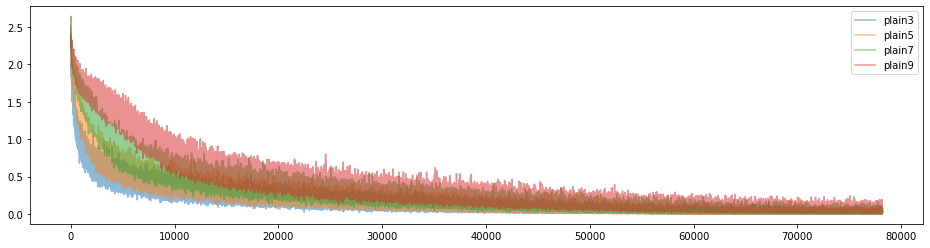

In [74]:
fig=plt.figure(figsize=(16, 4))
plt.plot(all_loss['plain3'], alpha=.5)
plt.plot(all_loss['plain5'], alpha=.5)
plt.plot(all_loss['plain7'], alpha=.5)
plt.plot(all_loss['plain9'], alpha=.5)
plt.legend([f'plain{i}' for i in [3, 5, 7, 9]])

### residual networks
It's harder to see here, but larger neural nets train better, which is the opposite of the "plain" networks.

/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


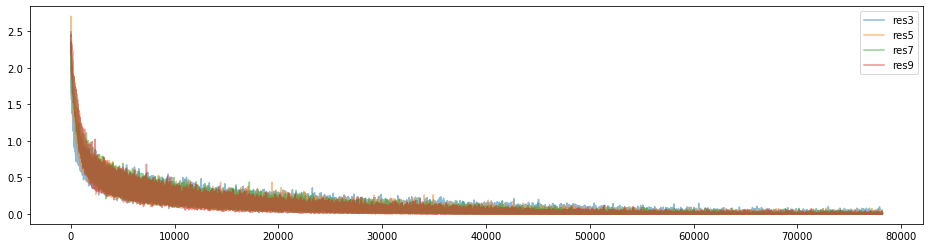

In [75]:
fig=plt.figure(figsize=(16, 4))
plt.plot(all_loss['res3'], alpha=.5)
plt.plot(all_loss['res5'], alpha=.5)
plt.plot(all_loss['res7'], alpha=.5)
plt.plot(all_loss['res9'], alpha=.5)
plt.legend([f'res{i}' for i in [3, 5, 7, 9]])

### Reproduction of He et al 2015, Fig 6

[0.0, 39.0625, 78.125, 117.1875, 156.25, 195.3125]

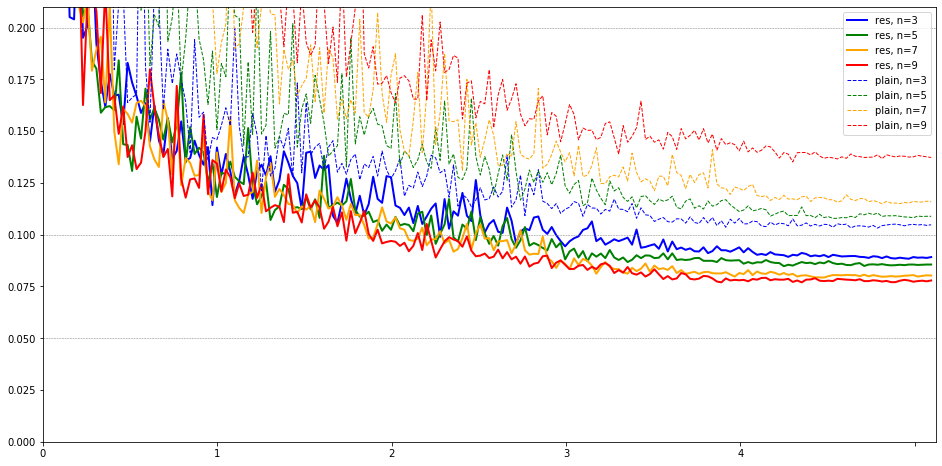

In [76]:
fig=plt.figure(figsize=(16, 8))
plt.plot(1 - np.array(all_acc_te['res3']), lineWidth=2, color='blue')
plt.plot(1 - np.array(all_acc_te['res5']), lineWidth=2, color='green')
plt.plot(1 - np.array(all_acc_te['res7']), lineWidth=2, color='orange')
plt.plot(1 - np.array(all_acc_te['res9']), lineWidth=2, color='red')

plt.plot(1 - np.array(all_acc_te['plain3']), '--', lineWidth=1, color='blue')
plt.plot(1 - np.array(all_acc_te['plain5']), '--', lineWidth=1, color='green')
plt.plot(1 - np.array(all_acc_te['plain7']), '--', lineWidth=1, color='orange')
plt.plot(1 - np.array(all_acc_te['plain9']), '--', lineWidth=1, color='red')

plt.legend([f'{ty}, n={i}' for ty in ['res', 'plain'] for i in [3, 5, 7, 9]])
xlim = plt.xlim([0, len(all_acc_tr['res9'])])
plt.plot(xlim, [0.2, 0.2], '--', lineWidth=.5, color='gray')
plt.plot(xlim, [0.1, 0.1], '--', lineWidth=.5, color='gray')
plt.plot(xlim, [0.05, 0.05], '--', lineWidth=.5, color='gray')
plt.ylim([0, .21])
locs = [x * 50000 / 128 / 10000 for x in range(0, 6000, 1000)]
labels = range(5)
plt.xticks(locs, labels)
locs